## 2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara <br>bisnis untuk digunakan sebagai fitur clustering. Lakukan <br>feature engineering! (20 poin)

Langkah-langkah:
<br>a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur
clustering. Tulis alasan teman-teman memilih fitur tersebut.
<br>b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).
Untuk mempermudah kamu, yuk lihat resource di bawah ini:

- Topic Machine Learning Preparation - Feature Engineering

Karena versi 3 hasilnya kurang maksimal maka saya buat versi 4, alih alih menggunakan AVG_INTERVAL, saya akan menggunakan BP_SUM sebagai Frequency diharapkan dapat menghasilkan hasil yang lebih baik.

<!-- Code Description
- MEMBER_NO-b : ID Member
- FFP_DATE : Frequent Flyer Program Join Date
- FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
- GENDER : Jenis Kelamin
- FFP_TIER : Tier dari Frequent Flyer Program
- WORK_CITY : Kota Asal
- WORK_PROVINCE : Provinsi Asal
- WORK_COUNTRY : Negara Asal
- AGE : Umur Customer
- LOAD_TIME : Tanggal data diambil
- FLIGHT_COUNT : Jumlah penerbangan Customer
- BP_SUM : Rencana Perjalanan
- SUM_YR_1 : Fare Revenue
- SUM_YR_2 : Votes Prices
- SEG_KM_SUM : Total jarak(km) penerbangan yg sudah dilakukan
- LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
- LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- AVG_INTERVAL : Rata-rata jarak waktu
- MAX_INTERVAL : Maksimal jarak waktu
- EXCHANGE_COUNT : Jumlah penukaran
- avg_discount : Rata rata discount yang didapat customer
- Points_Sum : Jumlah poin yang didapat customer
- Point_NotFlight : point yang tidak digunakan oleh members -->



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'flight_cleaned.csv')

In [3]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15


In [4]:
# feature selection berdasarkan RFM
df = df[['SUM_YR_1', 'avg_discount', 'Points_Sum']]
df.isnull().sum()


SUM_YR_1        0
avg_discount    0
Points_Sum      0
dtype: int64

In [5]:
df.head()

,SUM_YR_1,avg_discount,Points_Sum
0,239560.0,0.961639,619760
1,163618.0,1.254676,406361
2,116350.0,1.090870,372204
3,124560.0,0.970658,338813
4,112364.0,0.967692,343121


In [6]:
df.describe()

,SUM_YR_1,avg_discount,Points_Sum
count,58255.000000,58255.000000,58255.000000
mean,5366.827963,0.720627,12742.648820
std,8103.595049,0.183895,20606.104272
min,0.000000,0.000000,0.000000
25%,1016.000000,0.612155,2872.500000
50%,2808.000000,0.711468,6487.000000
75%,6591.500000,0.808159,14527.000000
max,239560.000000,1.500000,985572.000000


In [7]:
# save df mentah
df.to_csv(r'flight_Versi4_RAW', index=False)

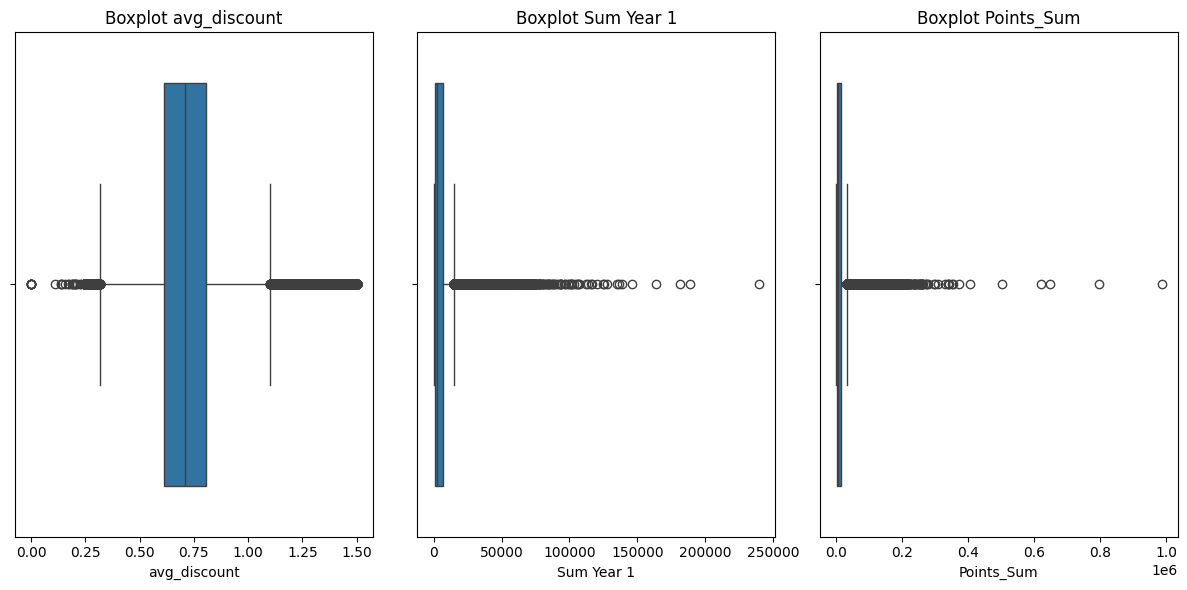

In [8]:


#buat boxplot untuk # fitur 'FLIGHT_COUNT', 'SUM_YR_1', dan 'LAST_TO_END' contohnya seperti dibawah
#boxplot untuk fitur monthlycharges dan total charges
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
# plt.title('Boxplot Monthly Charges by Churn')
# plt.xlabel('Churn')
# plt.ylabel('Monthly Charges')
# plt.subplot(1, 2, 2)
# sns.boxplot(x='Churn', y='TotalCharges', data=df)
# plt.title('Boxplot Total Charges by Churn')
# plt.xlabel('Churn')
# plt.ylabel('Total Charges')
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='avg_discount', data=df)
plt.title('Boxplot avg_discount')
plt.xlabel('avg_discount')
plt.subplot(1, 3, 2)
sns.boxplot(x='SUM_YR_1', data=df)
plt.title('Boxplot Sum Year 1')
plt.xlabel('Sum Year 1')
plt.subplot(1, 3, 3)
sns.boxplot(x='Points_Sum', data=df)
plt.title('Boxplot Points_Sum')
plt.xlabel('Points_Sum')
plt.tight_layout()
plt.show()

In [9]:
# transformasi LOG1P untuk mengurangi skewness untuk ketiga fitur
df['SUM_YR_1_Log'] = np.log1p(df['SUM_YR_1'])
df['Points_Sum_Log'] = np.log1p(df['Points_Sum'])


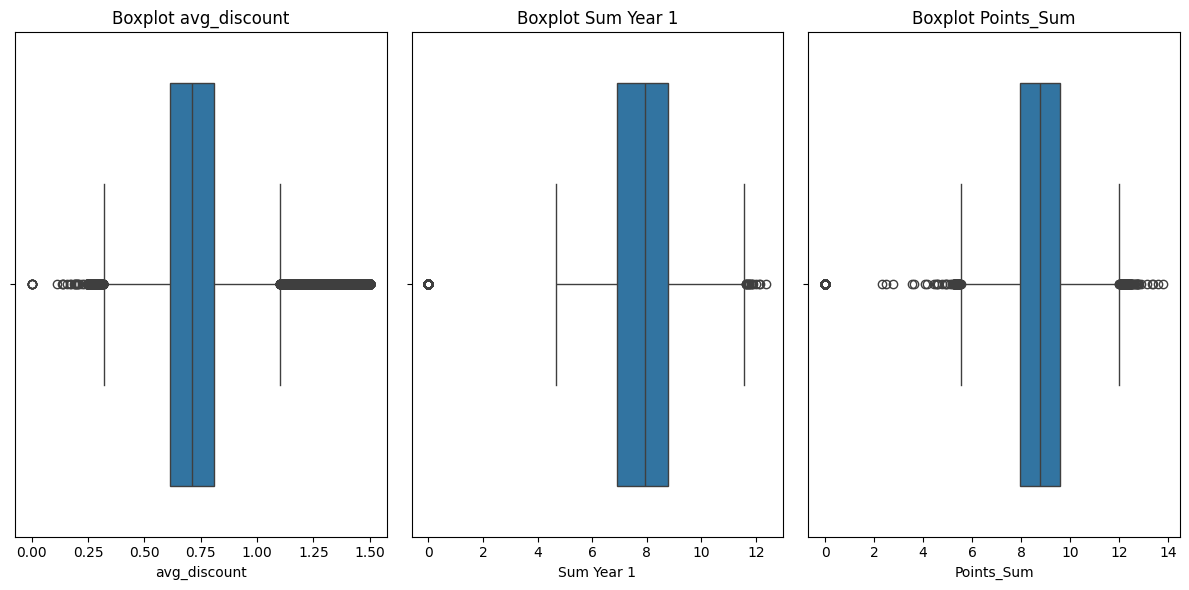

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='avg_discount', data=df)
plt.title('Boxplot avg_discount')
plt.xlabel('avg_discount')
plt.subplot(1, 3, 2)
sns.boxplot(x='SUM_YR_1_Log', data=df)
plt.title('Boxplot Sum Year 1')
plt.xlabel('Sum Year 1')
plt.subplot(1, 3, 3)
sns.boxplot(x='Points_Sum_Log', data=df)
plt.title('Boxplot Points_Sum')
plt.xlabel('Points_Sum')
plt.tight_layout()
plt.show()

In [11]:
# gunakan zscore untuk membuang outlier
from scipy import stats
df['SUM_YR_1_Log_Z'] = np.abs(stats.zscore(df['SUM_YR_1_Log']))
df['avg_discount_Z'] = np.abs(stats.zscore(df['avg_discount']))
df['Points_Sum_Log_Z'] = np.abs(stats.zscore(df['Points_Sum_Log']))
# filter outlier dengan threshold zscore 3
threshold = 3
df_filtered = df[(df['avg_discount_Z'] < threshold) & 
                 (df['SUM_YR_1_Log_Z'] < threshold) & 
                 (df['Points_Sum_Log_Z'] < threshold)]


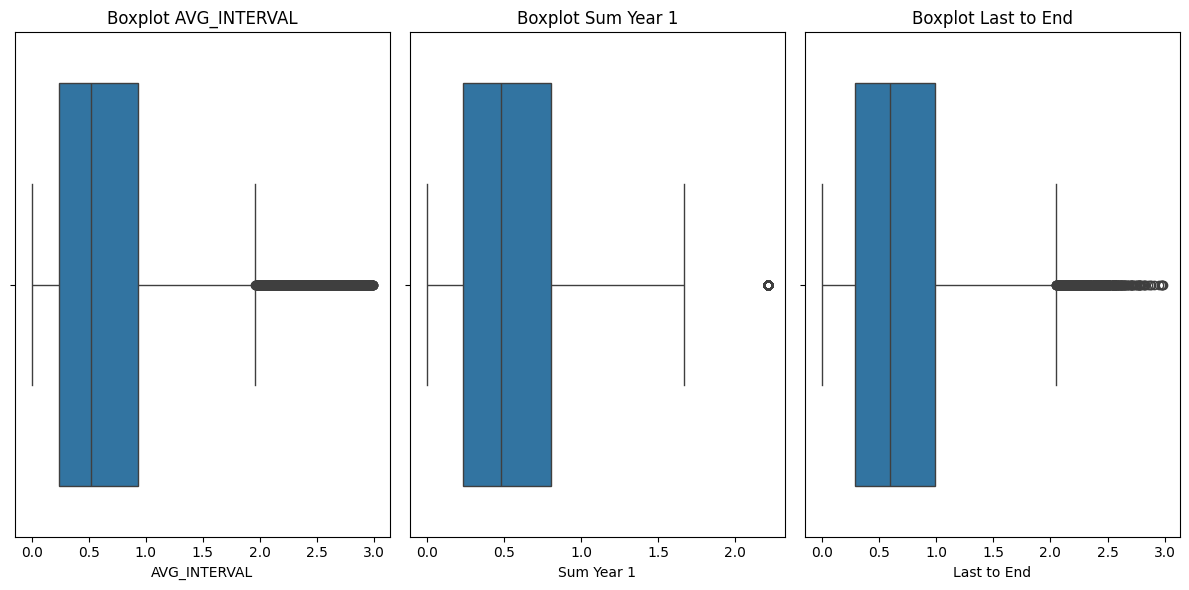

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='avg_discount_Z', data=df_filtered)
plt.title('Boxplot AVG_INTERVAL')
plt.xlabel('AVG_INTERVAL')
plt.subplot(1, 3, 2)
sns.boxplot(x='SUM_YR_1_Log_Z', data=df_filtered)
plt.title('Boxplot Sum Year 1')
plt.xlabel('Sum Year 1')
plt.subplot(1, 3, 3)
sns.boxplot(x='Points_Sum_Log_Z', data=df_filtered)
plt.title('Boxplot Last to End')
plt.xlabel('Last to End')
plt.tight_layout()
plt.show()

In [13]:
# drop fitur original sisakan fitur yang sudah dibersihkan dari outlier menggunakan zscore
df_filtered = df_filtered.drop(columns=['avg_discount', 'SUM_YR_1', 'Points_Sum', 'SUM_YR_1_Log', 'Points_Sum_Log'])

In [14]:
df_filtered.head()

,SUM_YR_1_Log_Z,avg_discount_Z,Points_Sum_Log_Z
3,1.533794,1.359654,2.975882
4,1.500886,1.343528,2.985297
5,1.523211,1.330771,2.882413
7,1.412725,0.068607,2.755017
8,1.345417,1.457537,2.973736


In [15]:
# save df yang sudah dibersihkan dari outlier
df_filtered.to_csv(r'flight_Versi4_NoOutlier.csv', index=False)

In [16]:
# scaling dengan menggunakan standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df_filtered.copy()
df_scaled[['avg_discount_Z', 'SUM_YR_1_Log_Z', 'Points_Sum_Log_Z']] = scaler.fit_transform(
    df_filtered[['avg_discount_Z', 'SUM_YR_1_Log_Z', 'Points_Sum_Log_Z']])
# save df yang sudah di scaling


In [17]:
df_scaled

,SUM_YR_1_Log_Z,avg_discount_Z,Points_Sum_Log_Z
3,1.194996,1.343081,4.596181
4,1.147388,1.312650,4.615077
5,1.179686,1.288575,4.408599
7,1.019846,-1.093287,4.152927
8,0.922471,1.527800,4.591876
...,...,...,...
58238,2.177704,-0.921326,2.730265
58239,-0.928242,-0.921326,2.730265
58240,-0.928242,-0.921326,2.730265
58243,2.177704,3.606845,4.358421


In [18]:
df_scaled.to_csv(r'flight_Versi4_Mateng.csv', index=False)